__Importing Libraries__

In [1]:
from pathlib import Path
import sys 
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.metrics import roc_curve, auc
import optuna
from optuna.samplers import TPESampler
from lightgbm import log_evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import plotly


__Importing CSV files__

In [2]:
flattened_officer_data = pd.read_csv('../data/officer_features_dataset.csv')
data_modelling = pd.read_csv("../data/modelling_officer_dataset.csv")
data_backtest = pd.read_csv("../data/backtesting_officer_dataset.csv")

/var/folders/c2/zbmcqxr93qq5t5w36fn3n3cr0000gn/T/ipykernel_2213/2859199390.py:1: DtypeWarning: Columns (615,616,617,618) have mixed types. Specify dtype option on import or set low_memory=False.
  flattened_officer_data = pd.read_csv('../data/officer_features_dataset.csv')
/var/folders/c2/zbmcqxr93qq5t5w36fn3n3cr0000gn/T/ipykernel_2213/2859199390.py:2: DtypeWarning: Columns (615,616,617,618) have mixed types. Specify dtype option on import or set low_memory=False.
  data_modelling = pd.read_csv("../data/modelling_officer_dataset.csv")
/var/folders/c2/zbmcqxr93qq5t5w36fn3n3cr0000gn/T/ipykernel_2213/2859199390.py:3: DtypeWarning: Columns (615,616,617,618) have mixed types. Specify dtype option on import or set low_memory=False.
  data_backtest = pd.read_csv("../data/backtesting_officer_dataset.csv")


In [3]:
flattened_officer_data

,officer_number,filings_sum_appt_GAZ1(A)_0_months,filings_sum_appt_GAZ1(A)_3_months,filings_sum_appt_GAZ1(A)_6_months,filings_sum_appt_GAZ1(A)_12_months,filings_sum_appt_GAZ1(A)_24_months,filings_sum_appt_GAZ1(A)_36_months,filings_sum_appt_GAZ1(A)_all_months,filings_sum_appt_RESOLUTIONS_0_months,filings_sum_appt_RESOLUTIONS_3_months,...,filings_max_appt_MG08_6_months,filings_max_appt_MG08_12_months,filings_max_appt_MG08_24_months,filings_max_appt_MG08_36_months,filings_max_appt_MG08_all_months,label,current_appointment,policy,observation_date,company
0,2320459b9764dd74c84ac18cc3dae6729cb76767,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-nBjmvCy4wxPKrWXusFD7RE,pol-rY5BDxSfvmR2QMmUjoZTgD,2018-11-13,co-nBjmvCy4wxPKrWXusFD7RE
1,1816c2575deb9e44d8ed129592ddb694ae2aa9c6,0.0,0.0,0.0,1.0,2.0,2.0,18.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-nBjmvCy4wxPKrWXusFD7RE,pol-rY5BDxSfvmR2QMmUjoZTgD,2018-11-13,co-nBjmvCy4wxPKrWXusFD7RE
2,b30185688bf32a5a113d1a8d3ce15b2ae22449a8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-nBjmvCy4wxPKrWXusFD7RE,pol-rY5BDxSfvmR2QMmUjoZTgD,2018-11-13,co-nBjmvCy4wxPKrWXusFD7RE
3,40c983af1a4c7f62231eb8c42036068fd412de00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-nBjmvCy4wxPKrWXusFD7RE,pol-rY5BDxSfvmR2QMmUjoZTgD,2018-11-13,co-nBjmvCy4wxPKrWXusFD7RE
4,6be36a3be738d0058566fd6a1993a52c02f7be2b,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-nBjmvCy4wxPKrWXusFD7RE,pol-rY5BDxSfvmR2QMmUjoZTgD,2018-11-13,co-nBjmvCy4wxPKrWXusFD7RE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6988,44fb2190750c31a203f7ddb291ea12f9f196d8cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-C6GbFydvYRaKahovC8GSbj,pol-n5AEgoTBXzAz5irzPiCtRJ,2023-03-13,co-C6GbFydvYRaKahovC8GSbj
6989,24684a7fb902fabe5cdcf776bab1d74ea2180bf4,0.0,1.0,1.0,1.0,1.0,3.0,19.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-8QdhvuVmNF43NnUUP6rZBe,pol-NwHyxGniBZNpuqWHyFXFUA,2023-03-14,co-8QdhvuVmNF43NnUUP6rZBe
6990,a5705feef6e3031e3bb9ce145b45b6c6240bc3ea,0.0,0.0,2.0,2.0,2.0,2.0,5.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-8QdhvuVmNF43NnUUP6rZBe,pol-NwHyxGniBZNpuqWHyFXFUA,2023-03-14,co-8QdhvuVmNF43NnUUP6rZBe
6991,19fd0fc0d3aebb69f52706e087302499073f9d17,0.0,0.0,0.0,0.0,1.0,2.0,10.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-CoAEwJZ4maRKo8wZkvZGjh,pol-6ncngT6CmL2brPZRGPDCfE,2023-03-15,co-CoAEwJZ4maRKo8wZkvZGjh


__Fixing columns with multiple datatypes in the modelling and backtest datasets__

In [4]:
flattened_officer_data.replace([np.inf, -np.inf], np.nan, inplace=True)

flattened_officer_data["officer_min_officer_age_at_appointment"] = flattened_officer_data["officer_min_officer_age_at_appointment"].apply(lambda age : np.nan if age=='unknown' else float(age))
flattened_officer_data["officer_mean_officer_age_at_appointment"] =flattened_officer_data["officer_mean_officer_age_at_appointment"].apply(lambda age : np.nan if age=='unknown' else float(age))
flattened_officer_data["officer_median_officer_age_at_appointment"] = flattened_officer_data["officer_median_officer_age_at_appointment"].apply(lambda age : np.nan if age=='unknown' else float(age))
flattened_officer_data["officer_max_officer_age_at_appointment"] = flattened_officer_data["officer_max_officer_age_at_appointment"].apply(lambda age : np.nan if age=='unknown' else float(age))
flattened_officer_data['nationality'] = flattened_officer_data['nationality'].astype('str')


In [5]:
data_modelling.replace([np.inf, -np.inf], np.nan, inplace=True)

data_modelling["officer_min_officer_age_at_appointment"] = data_modelling["officer_min_officer_age_at_appointment"].apply(lambda age : np.nan if age=='unknown' else float(age))
data_modelling["officer_mean_officer_age_at_appointment"] =data_modelling["officer_mean_officer_age_at_appointment"].apply(lambda age : np.nan if age=='unknown' else float(age))
data_modelling["officer_median_officer_age_at_appointment"] = data_modelling["officer_median_officer_age_at_appointment"].apply(lambda age : np.nan if age=='unknown' else float(age))
data_modelling["officer_max_officer_age_at_appointment"] = data_modelling["officer_max_officer_age_at_appointment"].apply(lambda age : np.nan if age=='unknown' else float(age))


In [6]:
data_backtest.replace([np.inf, -np.inf], np.nan, inplace=True)

data_backtest["officer_min_officer_age_at_appointment"] = data_backtest["officer_min_officer_age_at_appointment"].apply(lambda age : np.nan if age=='unknown' else float(age))
data_backtest["officer_mean_officer_age_at_appointment"] =data_backtest["officer_mean_officer_age_at_appointment"].apply(lambda age : np.nan if age=='unknown' else float(age))
data_backtest["officer_median_officer_age_at_appointment"] = data_backtest["officer_median_officer_age_at_appointment"].apply(lambda age : np.nan if age=='unknown' else float(age))
data_backtest["officer_max_officer_age_at_appointment"] = data_backtest["officer_max_officer_age_at_appointment"].apply(lambda age : np.nan if age=='unknown' else float(age))


In [7]:
columns_with_gaz1 = [col for col in data_modelling.columns if 'GAZ1' in col]
columns_with_gaz1
data_modelling[columns_with_gaz1] = data_modelling[columns_with_gaz1].fillna(0)
data_backtest[columns_with_gaz1] = data_backtest[columns_with_gaz1].fillna(0)
flattened_officer_data[columns_with_gaz1] = flattened_officer_data[columns_with_gaz1].fillna(0)

In [8]:
flattened_officer_data

,officer_number,filings_sum_appt_GAZ1(A)_0_months,filings_sum_appt_GAZ1(A)_3_months,filings_sum_appt_GAZ1(A)_6_months,filings_sum_appt_GAZ1(A)_12_months,filings_sum_appt_GAZ1(A)_24_months,filings_sum_appt_GAZ1(A)_36_months,filings_sum_appt_GAZ1(A)_all_months,filings_sum_appt_RESOLUTIONS_0_months,filings_sum_appt_RESOLUTIONS_3_months,...,filings_max_appt_MG08_6_months,filings_max_appt_MG08_12_months,filings_max_appt_MG08_24_months,filings_max_appt_MG08_36_months,filings_max_appt_MG08_all_months,label,current_appointment,policy,observation_date,company
0,2320459b9764dd74c84ac18cc3dae6729cb76767,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-nBjmvCy4wxPKrWXusFD7RE,pol-rY5BDxSfvmR2QMmUjoZTgD,2018-11-13,co-nBjmvCy4wxPKrWXusFD7RE
1,1816c2575deb9e44d8ed129592ddb694ae2aa9c6,0.0,0.0,0.0,1.0,2.0,2.0,18.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-nBjmvCy4wxPKrWXusFD7RE,pol-rY5BDxSfvmR2QMmUjoZTgD,2018-11-13,co-nBjmvCy4wxPKrWXusFD7RE
2,b30185688bf32a5a113d1a8d3ce15b2ae22449a8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-nBjmvCy4wxPKrWXusFD7RE,pol-rY5BDxSfvmR2QMmUjoZTgD,2018-11-13,co-nBjmvCy4wxPKrWXusFD7RE
3,40c983af1a4c7f62231eb8c42036068fd412de00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-nBjmvCy4wxPKrWXusFD7RE,pol-rY5BDxSfvmR2QMmUjoZTgD,2018-11-13,co-nBjmvCy4wxPKrWXusFD7RE
4,6be36a3be738d0058566fd6a1993a52c02f7be2b,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-nBjmvCy4wxPKrWXusFD7RE,pol-rY5BDxSfvmR2QMmUjoZTgD,2018-11-13,co-nBjmvCy4wxPKrWXusFD7RE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6988,44fb2190750c31a203f7ddb291ea12f9f196d8cc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-C6GbFydvYRaKahovC8GSbj,pol-n5AEgoTBXzAz5irzPiCtRJ,2023-03-13,co-C6GbFydvYRaKahovC8GSbj
6989,24684a7fb902fabe5cdcf776bab1d74ea2180bf4,0.0,1.0,1.0,1.0,1.0,3.0,19.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-8QdhvuVmNF43NnUUP6rZBe,pol-NwHyxGniBZNpuqWHyFXFUA,2023-03-14,co-8QdhvuVmNF43NnUUP6rZBe
6990,a5705feef6e3031e3bb9ce145b45b6c6240bc3ea,0.0,0.0,2.0,2.0,2.0,2.0,5.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-8QdhvuVmNF43NnUUP6rZBe,pol-NwHyxGniBZNpuqWHyFXFUA,2023-03-14,co-8QdhvuVmNF43NnUUP6rZBe
6991,19fd0fc0d3aebb69f52706e087302499073f9d17,0.0,0.0,0.0,0.0,1.0,2.0,10.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-CoAEwJZ4maRKo8wZkvZGjh,pol-6ncngT6CmL2brPZRGPDCfE,2023-03-15,co-CoAEwJZ4maRKo8wZkvZGjh


In [9]:
flattened_officer_data = flattened_officer_data.dropna(subset=['label'])
flattened_officer_data

,officer_number,filings_sum_appt_GAZ1(A)_0_months,filings_sum_appt_GAZ1(A)_3_months,filings_sum_appt_GAZ1(A)_6_months,filings_sum_appt_GAZ1(A)_12_months,filings_sum_appt_GAZ1(A)_24_months,filings_sum_appt_GAZ1(A)_36_months,filings_sum_appt_GAZ1(A)_all_months,filings_sum_appt_RESOLUTIONS_0_months,filings_sum_appt_RESOLUTIONS_3_months,...,filings_max_appt_MG08_6_months,filings_max_appt_MG08_12_months,filings_max_appt_MG08_24_months,filings_max_appt_MG08_36_months,filings_max_appt_MG08_all_months,label,current_appointment,policy,observation_date,company
0,2320459b9764dd74c84ac18cc3dae6729cb76767,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-nBjmvCy4wxPKrWXusFD7RE,pol-rY5BDxSfvmR2QMmUjoZTgD,2018-11-13,co-nBjmvCy4wxPKrWXusFD7RE
1,1816c2575deb9e44d8ed129592ddb694ae2aa9c6,0.0,0.0,0.0,1.0,2.0,2.0,18.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-nBjmvCy4wxPKrWXusFD7RE,pol-rY5BDxSfvmR2QMmUjoZTgD,2018-11-13,co-nBjmvCy4wxPKrWXusFD7RE
2,b30185688bf32a5a113d1a8d3ce15b2ae22449a8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-nBjmvCy4wxPKrWXusFD7RE,pol-rY5BDxSfvmR2QMmUjoZTgD,2018-11-13,co-nBjmvCy4wxPKrWXusFD7RE
3,40c983af1a4c7f62231eb8c42036068fd412de00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-nBjmvCy4wxPKrWXusFD7RE,pol-rY5BDxSfvmR2QMmUjoZTgD,2018-11-13,co-nBjmvCy4wxPKrWXusFD7RE
4,6be36a3be738d0058566fd6a1993a52c02f7be2b,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-nBjmvCy4wxPKrWXusFD7RE,pol-rY5BDxSfvmR2QMmUjoZTgD,2018-11-13,co-nBjmvCy4wxPKrWXusFD7RE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6987,9a20fcd96e81ed0f1d1659641f36a9d7966045a6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-VgxWaRgeHkTSGqrupAGiwf,pol-jD9ZbPTQ6wSaoWz9SnQW2Q,2023-03-13,co-VgxWaRgeHkTSGqrupAGiwf
6988,44fb2190750c31a203f7ddb291ea12f9f196d8cc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-C6GbFydvYRaKahovC8GSbj,pol-n5AEgoTBXzAz5irzPiCtRJ,2023-03-13,co-C6GbFydvYRaKahovC8GSbj
6989,24684a7fb902fabe5cdcf776bab1d74ea2180bf4,0.0,1.0,1.0,1.0,1.0,3.0,19.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-8QdhvuVmNF43NnUUP6rZBe,pol-NwHyxGniBZNpuqWHyFXFUA,2023-03-14,co-8QdhvuVmNF43NnUUP6rZBe
6990,a5705feef6e3031e3bb9ce145b45b6c6240bc3ea,0.0,0.0,2.0,2.0,2.0,2.0,5.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-8QdhvuVmNF43NnUUP6rZBe,pol-NwHyxGniBZNpuqWHyFXFUA,2023-03-14,co-8QdhvuVmNF43NnUUP6rZBe


In [10]:
def encode_cat_by_dr(df: pd.DataFrame, cat_cols_gini_analysis):
    df_encoded = df.copy()
    mapper_cat = {}
    for cat_col in cat_cols_gini_analysis:
        val_curr_cat_col = df_encoded.groupby(cat_col, dropna=False) \
            .agg({"label": "mean"}) \
            .sort_values(by="label", ascending=True) \
            .index
        mapper_cat[cat_col] = {val_cat_col: idx for idx, val_cat_col in enumerate(val_curr_cat_col)}
        df_encoded[cat_col] = df_encoded[cat_col].map(
            {
                val_cat_col: idx
                for idx, val_cat_col in enumerate(val_curr_cat_col)
            }
        )

    return df_encoded, mapper_cat

In [11]:
flattened_officer_data_mapped, mapper_cat = encode_cat_by_dr(df= flattened_officer_data, cat_cols_gini_analysis= ['nationality'])
flattened_officer_data_mapped

,officer_number,filings_sum_appt_GAZ1(A)_0_months,filings_sum_appt_GAZ1(A)_3_months,filings_sum_appt_GAZ1(A)_6_months,filings_sum_appt_GAZ1(A)_12_months,filings_sum_appt_GAZ1(A)_24_months,filings_sum_appt_GAZ1(A)_36_months,filings_sum_appt_GAZ1(A)_all_months,filings_sum_appt_RESOLUTIONS_0_months,filings_sum_appt_RESOLUTIONS_3_months,...,filings_max_appt_MG08_6_months,filings_max_appt_MG08_12_months,filings_max_appt_MG08_24_months,filings_max_appt_MG08_36_months,filings_max_appt_MG08_all_months,label,current_appointment,policy,observation_date,company
0,2320459b9764dd74c84ac18cc3dae6729cb76767,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-nBjmvCy4wxPKrWXusFD7RE,pol-rY5BDxSfvmR2QMmUjoZTgD,2018-11-13,co-nBjmvCy4wxPKrWXusFD7RE
1,1816c2575deb9e44d8ed129592ddb694ae2aa9c6,0.0,0.0,0.0,1.0,2.0,2.0,18.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-nBjmvCy4wxPKrWXusFD7RE,pol-rY5BDxSfvmR2QMmUjoZTgD,2018-11-13,co-nBjmvCy4wxPKrWXusFD7RE
2,b30185688bf32a5a113d1a8d3ce15b2ae22449a8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-nBjmvCy4wxPKrWXusFD7RE,pol-rY5BDxSfvmR2QMmUjoZTgD,2018-11-13,co-nBjmvCy4wxPKrWXusFD7RE
3,40c983af1a4c7f62231eb8c42036068fd412de00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-nBjmvCy4wxPKrWXusFD7RE,pol-rY5BDxSfvmR2QMmUjoZTgD,2018-11-13,co-nBjmvCy4wxPKrWXusFD7RE
4,6be36a3be738d0058566fd6a1993a52c02f7be2b,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-nBjmvCy4wxPKrWXusFD7RE,pol-rY5BDxSfvmR2QMmUjoZTgD,2018-11-13,co-nBjmvCy4wxPKrWXusFD7RE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6987,9a20fcd96e81ed0f1d1659641f36a9d7966045a6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-VgxWaRgeHkTSGqrupAGiwf,pol-jD9ZbPTQ6wSaoWz9SnQW2Q,2023-03-13,co-VgxWaRgeHkTSGqrupAGiwf
6988,44fb2190750c31a203f7ddb291ea12f9f196d8cc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-C6GbFydvYRaKahovC8GSbj,pol-n5AEgoTBXzAz5irzPiCtRJ,2023-03-13,co-C6GbFydvYRaKahovC8GSbj
6989,24684a7fb902fabe5cdcf776bab1d74ea2180bf4,0.0,1.0,1.0,1.0,1.0,3.0,19.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-8QdhvuVmNF43NnUUP6rZBe,pol-NwHyxGniBZNpuqWHyFXFUA,2023-03-14,co-8QdhvuVmNF43NnUUP6rZBe
6990,a5705feef6e3031e3bb9ce145b45b6c6240bc3ea,0.0,0.0,2.0,2.0,2.0,2.0,5.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,co-8QdhvuVmNF43NnUUP6rZBe,pol-NwHyxGniBZNpuqWHyFXFUA,2023-03-14,co-8QdhvuVmNF43NnUUP6rZBe


__Computing the Gini coefficient, Abs Gini Coefficient anf NaN rate for all values in the flattened_officer_data csv file__

In [12]:
def compute_gini(feature_values, output):
    """
    Compute the Gini impurity measure for the given feature column and associated labels

    Parameters
    ----------
    feature_values : array-like
        Values of a given feature in the dataset
    output : array-like
        Labels associated

    Returns
    -------
    float
        Gini coefficient for the given array
    """
    non_nan_indices = ~np.isnan(feature_values)
    non_nan_feature = feature_values[non_nan_indices]
    non_nan_output = output[non_nan_indices]

    fpr, tpr, _ = roc_curve(non_nan_output, non_nan_feature)
    gini_coefficient = 2 * auc(fpr, tpr) - 1
    return gini_coefficient

In [13]:
#flattened_officer_data_encoded = pd.get_dummies(flattened_officer_data, columns=['nationality'])

feature_columns = [col for col in flattened_officer_data_mapped.columns if col not in ['officer_number', 'label', 'current_appointment','policy', 'observation_date', 'company']]


In [14]:
feature_columns

['filings_sum_appt_GAZ1(A)_0_months',
 'filings_sum_appt_GAZ1(A)_3_months',
 'filings_sum_appt_GAZ1(A)_6_months',
 'filings_sum_appt_GAZ1(A)_12_months',
 'filings_sum_appt_GAZ1(A)_24_months',
 'filings_sum_appt_GAZ1(A)_36_months',
 'filings_sum_appt_GAZ1(A)_all_months',
 'filings_sum_appt_RESOLUTIONS_0_months',
 'filings_sum_appt_RESOLUTIONS_3_months',
 'filings_sum_appt_RESOLUTIONS_6_months',
 'filings_sum_appt_RESOLUTIONS_12_months',
 'filings_sum_appt_RESOLUTIONS_24_months',
 'filings_sum_appt_RESOLUTIONS_36_months',
 'filings_sum_appt_RESOLUTIONS_all_months',
 'filings_sum_appt_GAZ2_0_months',
 'filings_sum_appt_GAZ2_3_months',
 'filings_sum_appt_GAZ2_6_months',
 'filings_sum_appt_GAZ2_12_months',
 'filings_sum_appt_GAZ2_24_months',
 'filings_sum_appt_GAZ2_36_months',
 'filings_sum_appt_GAZ2_all_months',
 'filings_sum_appt_DS01_0_months',
 'filings_sum_appt_DS01_3_months',
 'filings_sum_appt_DS01_6_months',
 'filings_sum_appt_DS01_12_months',
 'filings_sum_appt_DS01_24_months',
 'f

In [15]:
def calculate_nan_rate(dataframe):
    total_rows = len(dataframe)
    nan_rate = dataframe.isna().sum() / total_rows
    return round(nan_rate,3)

In [16]:
nan_rate = calculate_nan_rate(flattened_officer_data_mapped)
nan_rate_df = pd.DataFrame({'feature': nan_rate.index, 'nan_rate': nan_rate.values})
nan_rate_df

,feature,nan_rate
0,officer_number,0.0
1,filings_sum_appt_GAZ1(A)_0_months,0.0
2,filings_sum_appt_GAZ1(A)_3_months,0.0
3,filings_sum_appt_GAZ1(A)_6_months,0.0
4,filings_sum_appt_GAZ1(A)_12_months,0.0
...,...,...
24373,label,0.0
24374,current_appointment,0.0
24375,policy,0.0
24376,observation_date,0.0


In [17]:
nan_rate_df[nan_rate_df['feature']=='nationality']

,feature,nan_rate
619,nationality,0.0


In [18]:
gini_results = []

for column in feature_columns:
    feature_values = flattened_officer_data_mapped[column]
    output = flattened_officer_data_mapped['label']
    gini_coefficient = compute_gini(feature_values, output)
    gini_results.append((column, gini_coefficient, abs(gini_coefficient)))
    
gini_df = pd.DataFrame(gini_results, columns=['feature', 'gini_coefficient', 'abs_gini_coefficient'])
gini_df

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rutvigothi/repos/non-payment-officer-netw

,feature,gini_coefficient,abs_gini_coefficient
0,filings_sum_appt_GAZ1(A)_0_months,0.000000,0.000000
1,filings_sum_appt_GAZ1(A)_3_months,0.027324,0.027324
2,filings_sum_appt_GAZ1(A)_6_months,0.042826,0.042826
3,filings_sum_appt_GAZ1(A)_12_months,0.045185,0.045185
4,filings_sum_appt_GAZ1(A)_24_months,0.044905,0.044905
...,...,...,...
24367,filings_max_appt_MG08_6_months,NaN,NaN
24368,filings_max_appt_MG08_12_months,NaN,NaN
24369,filings_max_appt_MG08_24_months,NaN,NaN
24370,filings_max_appt_MG08_36_months,NaN,NaN


In [19]:
gini_df[gini_df['feature']=='nationality']

,feature,gini_coefficient,abs_gini_coefficient
618,nationality,0.173521,0.173521


In [20]:
nan_rate_gini_df = gini_df.merge(nan_rate_df, on='feature', how='left')

In [21]:
nan_rate_gini_df = nan_rate_gini_df[nan_rate_gini_df['nan_rate']<0.3].sort_values(by = 'abs_gini_coefficient', ascending=False)


In [22]:
nan_rate_gini_df[nan_rate_gini_df['feature']=='nationality']

,feature,gini_coefficient,abs_gini_coefficient,nan_rate
618,nationality,0.173521,0.173521,0.0


__Computing Gini of entire dataset__

In [23]:
def compute_dataset_gini(classifier, x_data, y_data):
    """
    Return gini coefficient for whole dataset using a given classifier

    Parameters
    ----------
    classifier : LogisticRegression
        The given classifier
    x_data : pd.DataFrame
        The given data used as an input for the classifier predict function
    y_data : pd.Series
        The expected output

    Returns
    -------
    gini : float
        The list of the gini coefficient
    """
    y_score_tr = classifier.predict_proba(x_data)
    fpr, tpr, _ = metrics.roc_curve(y_data, y_score_tr[:, 1])
    roc_auc_tr = metrics.auc(fpr, tpr)
    gini = 2 * roc_auc_tr - 1
    return gini

In [24]:
#Setting the thresholds
GINI_THR = 0.01 #try changing this too.
CORR_THR = 0.6 #Change to 0.3

In [25]:
meta_cols = [
    'officer_number',
    'current_appointment',
    'policy',
    'company',
    'observation_date'
]

In [26]:
train_data_wo_meta_cols = data_modelling[[col for col in data_modelling if col not in meta_cols]]
test_data_wo_meta_cols = data_backtest[[col for col in data_backtest if col not in meta_cols]]

In [27]:
train_data_wo_meta_cols

,filings_sum_appt_GAZ1(A)_0_months,filings_sum_appt_GAZ1(A)_3_months,filings_sum_appt_GAZ1(A)_6_months,filings_sum_appt_GAZ1(A)_12_months,filings_sum_appt_GAZ1(A)_24_months,filings_sum_appt_GAZ1(A)_36_months,filings_sum_appt_GAZ1(A)_all_months,filings_sum_appt_RESOLUTIONS_0_months,filings_sum_appt_RESOLUTIONS_3_months,filings_sum_appt_RESOLUTIONS_6_months,...,filings_max_appt_MG07_36_months,filings_max_appt_MG07_all_months,filings_max_appt_MG08_0_months,filings_max_appt_MG08_3_months,filings_max_appt_MG08_6_months,filings_max_appt_MG08_12_months,filings_max_appt_MG08_24_months,filings_max_appt_MG08_36_months,filings_max_appt_MG08_all_months,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5931,0.0,0.0,0.0,1.0,2.0,2.0,18.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5932,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


__Process Nationality__

In [28]:
train_data_wo_meta_cols_new, mapper_cat = encode_cat_by_dr(df= train_data_wo_meta_cols, cat_cols_gini_analysis= ['nationality'])
test_data_wo_meta_cols_new, mapper_cat = encode_cat_by_dr(df= test_data_wo_meta_cols, cat_cols_gini_analysis= ['nationality'])


In [29]:
test_data_wo_meta_cols_new['nationality']

0       24
1       24
2       24
3       24
4       24
        ..
1052    23
1053    24
1054    24
1055    24
1056    24
Name: nationality, Length: 1057, dtype: int64

In [30]:
train, val  = train_test_split(train_data_wo_meta_cols_new,
                               
                               test_size=0.2,
                               random_state=42,
                              stratify=train_data_wo_meta_cols_new["label"])

In [31]:
train.nationality

3768    43
1620    38
4825    40
5123    43
2009    43
        ..
4926    43
3744    49
699     43
926     43
1606    29
Name: nationality, Length: 4748, dtype: int64

__Creating target and estimators__

In [32]:
def create_target_and_estimators(df, target_name):
    assert target_name in df.columns
    model_cols = [col for col in df.columns if col!= target_name]
    X = df[model_cols]
    y = df[target_name]
    return X, y
    

In [33]:
X_train, y_train = create_target_and_estimators(df=train, target_name="label")
X_val, y_val = create_target_and_estimators(df=val, target_name="label")

In [34]:
X_val['nationality']

531     10
4535    43
4346    43
3573    43
945     43
        ..
5677    43
5534    43
1505    44
3696    43
3723    39
Name: nationality, Length: 1187, dtype: int64

__Check correlation between all the feature columns__

In [35]:
def remove_collinear_features(dataframe, threshold, exclude, gini_table):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.

    Inputs:
        dataframe: features dataframe
        threshold: features with correlations greater than this value are removed
        exclude: features we manually want to exclude
        gini_table: output of data prep stage having the list of features with corresponding gini

    Output:
        dataframe that contains only the non-highly-collinear features
    '''

    # get gini values by feats
    feats_by_gini = dict(zip(gini_table.column_name, gini_table.gini_coeff_abs))
    # Calculate the correlation matrix

    corr_matrix_before = dataframe.corr()

    iters = range(len(corr_matrix_before.columns) - 1)
    drop_cols = []
    corr_values = {}
    # -> create a dataframe of corr_values_remove  {}
    
    
    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i + 1):

            item = corr_matrix_before.iloc[j:(j + 1), (i + 1):(i + 2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                corr_values[col.values[0]] = row.values[0]
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                if col[0] not in exclude and row[0] not in exclude:
                    if feats_by_gini[row[0]] >= feats_by_gini[col[0]]:
                        drop_cols.append(col[0])
                    else:
                        drop_cols.append(row[0])
    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    dataframe = dataframe.drop(columns=drops)
    corr_matrix_after = dataframe.corr()

    print('Removed Columns {}'.format(drops))
    return dataframe, drops, corr_matrix_before, corr_matrix_after, corr_values


In [36]:
gini_table_filtered = nan_rate_gini_df[(nan_rate_gini_df['abs_gini_coefficient'] > GINI_THR)]

gini_table_filtered

,feature,gini_coefficient,abs_gini_coefficient,nan_rate
618,nationality,0.173521,0.173521,0.000
171,filings_mean_appt_AA_12_months,-0.131707,0.131707,0.141
173,filings_mean_appt_AA_36_months,-0.127414,0.127414,0.141
272,filings_median_appt_GAZ1_all_months,0.123159,0.123159,0.000
153,filings_mean_appt_GAZ1_all_months,0.121411,0.121411,0.000
...,...,...,...,...
113,filings_sum_appt_NEWINC_3_months,0.010928,0.010928,0.124
1226,filings_min_appt_CH01_12_months,-0.010897,0.010897,0.264
647,financials_any_financial_company_flag,0.010234,0.010234,0.139
637,financials_min_trade_creditors_to_total_assets,-0.010183,0.010183,0.000


In [37]:
gini_table_filtered = gini_table_filtered.rename({"feature": "column_name" , "abs_gini_coefficient": "gini_coeff_abs"}, axis=1)


In [38]:
gini_table_filtered

,column_name,gini_coefficient,gini_coeff_abs,nan_rate
618,nationality,0.173521,0.173521,0.000
171,filings_mean_appt_AA_12_months,-0.131707,0.131707,0.141
173,filings_mean_appt_AA_36_months,-0.127414,0.127414,0.141
272,filings_median_appt_GAZ1_all_months,0.123159,0.123159,0.000
153,filings_mean_appt_GAZ1_all_months,0.121411,0.121411,0.000
...,...,...,...,...
113,filings_sum_appt_NEWINC_3_months,0.010928,0.010928,0.124
1226,filings_min_appt_CH01_12_months,-0.010897,0.010897,0.264
647,financials_any_financial_company_flag,0.010234,0.010234,0.139
637,financials_min_trade_creditors_to_total_assets,-0.010183,0.010183,0.000


In [39]:
gini_table_filtered[gini_table_filtered['column_name']=='nationality']

,column_name,gini_coefficient,gini_coeff_abs,nan_rate
618,nationality,0.173521,0.173521,0.0


In [40]:
#Check for the dummy thing. Maybe I converted nationality to dummies? 
#Nationality needs to be excluded. 
selected_feats_by_gini = gini_table_filtered.column_name.to_list()
X_train_data_filtered = X_train[selected_feats_by_gini]
X_val_data_filtered = X_val[selected_feats_by_gini]

In [41]:
X_train_val_filtered =  pd.concat([X_train_data_filtered,X_val_data_filtered], axis=0)

In [42]:
X_train_val_filtered

,nationality,filings_mean_appt_AA_12_months,filings_mean_appt_AA_36_months,filings_median_appt_GAZ1_all_months,filings_mean_appt_GAZ1_all_months,financials_mean_time_to_publish_financials,filings_min_appt_AA_all_months,financials_median_time_to_publish_financials,filings_median_appt_AA_all_months,filings_mean_appt_NEWINC_36_months,...,filings_median_appt_TM01_36_months,filings_mean_appt_NEWINC_3_months,filings_max_appt_TM01_3_months,filings_max_appt_CS01_24_months,filings_max_appt_NEWINC_3_months,filings_sum_appt_NEWINC_3_months,filings_min_appt_CH01_12_months,financials_any_financial_company_flag,financials_min_trade_creditors_to_total_assets,filings_median_appt_NEWINC_6_months
3768,43,NaN,NaN,1.0,1.00,0.00,NaN,0.0,NaN,0.00,...,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.00000,0.0
1620,38,0.29,0.78,0.0,0.39,250.24,0.0,270.0,9.0,0.00,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.00000,0.0
4825,40,1.00,1.00,0.0,0.00,359.00,1.0,359.0,1.0,1.00,...,NaN,0.0,NaN,3.0,0.0,0.0,NaN,1.0,0.00000,0.0
5123,43,0.50,1.00,0.0,0.00,299.50,2.0,299.5,12.5,0.00,...,2.5,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.12524,0.0
2009,43,0.83,2.50,0.0,0.00,239.00,0.0,248.0,27.0,0.00,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.05910,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5677,43,0.50,2.00,0.0,0.12,252.00,0.0,283.0,2.5,0.38,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.00000,0.0
5534,43,NaN,NaN,0.0,0.00,0.00,NaN,0.0,NaN,1.00,...,NaN,0.0,NaN,1.0,0.0,0.0,NaN,NaN,0.00000,0.0
1505,44,1.00,3.00,0.0,0.00,277.00,24.0,277.0,24.0,0.00,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.00000,0.0
3696,43,0.14,0.43,0.0,0.43,277.33,0.0,280.5,15.0,0.00,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.00000,0.0


In [43]:
train_filtered_corr, \
drops, corr_matrix_before, corr_matrix_after, corr_values = remove_collinear_features(dataframe=X_train_val_filtered, 
                                                                                      threshold= CORR_THR, 
                                                                                      exclude=[], 
                                                                                      gini_table= gini_table_filtered
                                                                                     )

filings_mean_appt_AA_36_months | filings_mean_appt_AA_12_months | 0.81
filings_mean_appt_GAZ1_all_months | filings_median_appt_GAZ1_all_months | 0.91
financials_median_time_to_publish_financials | financials_mean_time_to_publish_financials | 0.99
filings_median_appt_AA_all_months | filings_min_appt_AA_all_months | 0.76
filings_mean_appt_AA_all_months | filings_min_appt_AA_all_months | 0.78
filings_mean_appt_AA_all_months | filings_median_appt_AA_all_months | 0.98
financials_min_time_to_publish_financials | financials_mean_time_to_publish_financials | 0.8
financials_min_time_to_publish_financials | financials_median_time_to_publish_financials | 0.77
filings_median_appt_AA_36_months | filings_mean_appt_AA_12_months | 0.75
filings_median_appt_AA_36_months | filings_mean_appt_AA_36_months | 0.92
filings_mean_appt_AR01_all_months | filings_min_appt_AA_all_months | 0.63
filings_mean_appt_AR01_all_months | filings_median_appt_AA_all_months | 0.74
filings_mean_appt_AR01_all_months | filings_me

filings_min_appt_NEWINC_36_months | filings_mean_appt_NEWINC_36_months | 0.82
filings_min_appt_NEWINC_36_months | filings_mean_appt_NEWINC_24_months | 0.69
filings_min_appt_NEWINC_36_months | filings_median_appt_NEWINC_36_months | 0.8
filings_min_appt_NEWINC_36_months | filings_median_appt_NEWINC_24_months | 0.69
filings_mean_appt_TM01_6_months | filings_mean_appt_TM01_all_months | 0.62
filings_median_appt_TM01_all_months | filings_mean_appt_TM01_all_months | 0.97
filings_median_appt_TM01_all_months | filings_min_appt_TM01_all_months | 0.83
filings_median_appt_TM01_all_months | filings_mean_appt_TM01_6_months | 0.63
filings_max_appt_TM01_24_months | filings_max_appt_TM01_all_months | 0.63
filings_max_appt_TM01_24_months | filings_mean_appt_TM01_all_months | 0.67
filings_max_appt_TM01_24_months | filings_median_appt_TM01_all_months | 0.62
filings_median_appt_GAZ1_12_months | filings_mean_appt_GAZ1_36_months | 0.63
filings_median_appt_GAZ1_12_months | filings_mean_appt_GAZ1_24_months | 0

filings_min_appt_GAZ1(A)_all_months | filings_median_appt_GAZ1(A)_all_months | 0.74
filings_mean_appt_TM01_3_months | filings_mean_appt_TM01_all_months | 0.61
filings_mean_appt_TM01_3_months | filings_mean_appt_TM01_6_months | 0.84
filings_mean_appt_TM01_3_months | filings_median_appt_TM01_all_months | 0.62
filings_mean_appt_TM01_3_months | filings_min_appt_TM01_12_months | 0.63
filings_mean_appt_TM01_3_months | filings_mean_appt_TM01_12_months | 0.78
filings_mean_appt_TM01_3_months | filings_median_appt_TM01_6_months | 0.8
filings_mean_appt_TM01_3_months | filings_min_appt_TM01_6_months | 0.68
filings_median_appt_TM01_36_months | filings_mean_appt_TM01_all_months | 0.83
filings_median_appt_TM01_36_months | filings_min_appt_TM01_all_months | 0.74
filings_median_appt_TM01_36_months | filings_mean_appt_TM01_6_months | 0.72
filings_median_appt_TM01_36_months | filings_median_appt_TM01_all_months | 0.86
filings_median_appt_TM01_36_months | filings_max_appt_TM01_24_months | 0.67
filings_med

In [44]:
train_filtered_corr

,nationality,filings_mean_appt_AA_12_months,filings_median_appt_GAZ1_all_months,financials_mean_time_to_publish_financials,filings_min_appt_AA_all_months,filings_mean_appt_NEWINC_36_months,filings_sum_appt_NEWINC_36_months,filings_sum_appt_GAZ1_all_months,financials_mean_turnover_to_total_assets,filings_mean_appt_GAZ1_36_months,...,financials_mean_ebitda_to_total_assets,officer_median_officer_age_at_appointment,filings_mean_appt_GAZ1_3_months,filings_max_appt_GAZ1_3_months,sector_compare_current_other_sector_group_description,sector_compare_current_other_sector_code,financials_all_financial_company_flag,filings_median_appt_CH01_24_months,filings_max_appt_CS01_24_months,financials_any_financial_company_flag
3768,43,NaN,1.0,0.00,NaN,0.00,0.0,1.0,0.00000,0.0,...,0.00000,31.36,0.0,0.0,0,0,NaN,NaN,NaN,NaN
1620,38,0.29,0.0,250.24,0.0,0.00,0.0,19.0,0.45655,0.0,...,-260.18541,NaN,0.0,0.0,1,1,1.0,0.0,3.0,1.0
4825,40,1.00,0.0,359.00,1.0,1.00,1.0,0.0,0.00000,0.0,...,0.00000,50.18,0.0,0.0,1,1,1.0,NaN,3.0,1.0
5123,43,0.50,0.0,299.50,2.0,0.00,0.0,0.0,0.00000,0.0,...,0.00000,57.44,0.0,0.0,0,0,1.0,0.5,1.0,1.0
2009,43,0.83,0.0,239.00,0.0,0.00,0.0,0.0,2.19811,0.0,...,0.07231,47.36,0.0,0.0,1,1,1.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5677,43,0.50,0.0,252.00,0.0,0.38,3.0,1.0,0.25269,0.0,...,0.02607,46.65,0.0,0.0,1,0,0.0,0.0,3.0,1.0
5534,43,NaN,0.0,0.00,NaN,1.00,1.0,0.0,0.00000,0.0,...,0.00000,33.36,0.0,0.0,0,0,NaN,NaN,1.0,NaN
1505,44,1.00,0.0,277.00,24.0,0.00,0.0,0.0,0.00000,0.0,...,0.00000,45.42,0.0,0.0,0,0,0.0,0.0,3.0,1.0
3696,43,0.14,0.0,277.33,0.0,0.00,0.0,3.0,3.35946,0.0,...,-0.51382,41.52,0.0,0.0,0,0,0.0,0.0,2.0,1.0


In [45]:
X_train_data_filtered_corr = X_train_data_filtered[[col for col in X_train_data_filtered.columns if col not in drops]]
X_val_data_filtered_corr = X_val_data_filtered[[col for col in X_val_data_filtered.columns if col not in drops]]

In [46]:
'nationality' in train_filtered_corr.columns

True

In [47]:
X_val_data_filtered_corr

,nationality,filings_mean_appt_AA_12_months,filings_median_appt_GAZ1_all_months,financials_mean_time_to_publish_financials,filings_min_appt_AA_all_months,filings_mean_appt_NEWINC_36_months,filings_sum_appt_NEWINC_36_months,filings_sum_appt_GAZ1_all_months,financials_mean_turnover_to_total_assets,filings_mean_appt_GAZ1_36_months,...,financials_mean_ebitda_to_total_assets,officer_median_officer_age_at_appointment,filings_mean_appt_GAZ1_3_months,filings_max_appt_GAZ1_3_months,sector_compare_current_other_sector_group_description,sector_compare_current_other_sector_code,financials_all_financial_company_flag,filings_median_appt_CH01_24_months,filings_max_appt_CS01_24_months,financials_any_financial_company_flag
531,10,NaN,0.0,0.00,NaN,NaN,NaN,0.0,0.00000,0.0,...,0.00000,NaN,0.0,0.0,0,0,NaN,NaN,NaN,NaN
4535,43,0.00,0.0,273.00,12.0,0.00,0.0,0.0,0.00000,0.0,...,0.00000,NaN,0.0,0.0,1,1,1.0,0.0,NaN,1.0
4346,43,0.50,0.5,329.00,11.0,0.00,0.0,1.0,0.00000,0.0,...,0.00000,55.70,0.0,0.0,0,0,1.0,0.0,2.0,1.0
3573,43,0.50,0.0,169.62,1.0,0.10,1.0,2.0,0.00000,0.0,...,0.00000,38.74,0.0,0.0,1,0,0.0,0.0,2.0,1.0
945,43,1.00,0.0,452.00,4.0,0.00,0.0,0.0,0.57562,0.0,...,-0.29400,42.86,0.0,0.0,0,0,1.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5677,43,0.50,0.0,252.00,0.0,0.38,3.0,1.0,0.25269,0.0,...,0.02607,46.65,0.0,0.0,1,0,0.0,0.0,3.0,1.0
5534,43,NaN,0.0,0.00,NaN,1.00,1.0,0.0,0.00000,0.0,...,0.00000,33.36,0.0,0.0,0,0,NaN,NaN,1.0,NaN
1505,44,1.00,0.0,277.00,24.0,0.00,0.0,0.0,0.00000,0.0,...,0.00000,45.42,0.0,0.0,0,0,0.0,0.0,3.0,1.0
3696,43,0.14,0.0,277.33,0.0,0.00,0.0,3.0,3.35946,0.0,...,-0.51382,41.52,0.0,0.0,0,0,0.0,0.0,2.0,1.0


In [48]:
#Replace all NaNs with 0 for all the columns
X_train_data_filtered_corr_nonan = X_train_data_filtered_corr.fillna(0)
X_val_data_filtered_corr_nonan = X_val_data_filtered_corr.fillna(0)

In [49]:
X_val_data_filtered_corr_nonan

,nationality,filings_mean_appt_AA_12_months,filings_median_appt_GAZ1_all_months,financials_mean_time_to_publish_financials,filings_min_appt_AA_all_months,filings_mean_appt_NEWINC_36_months,filings_sum_appt_NEWINC_36_months,filings_sum_appt_GAZ1_all_months,financials_mean_turnover_to_total_assets,filings_mean_appt_GAZ1_36_months,...,financials_mean_ebitda_to_total_assets,officer_median_officer_age_at_appointment,filings_mean_appt_GAZ1_3_months,filings_max_appt_GAZ1_3_months,sector_compare_current_other_sector_group_description,sector_compare_current_other_sector_code,financials_all_financial_company_flag,filings_median_appt_CH01_24_months,filings_max_appt_CS01_24_months,financials_any_financial_company_flag
531,10,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00000,0.0,...,0.00000,0.00,0.0,0.0,0,0,0.0,0.0,0.0,0.0
4535,43,0.00,0.0,273.00,12.0,0.00,0.0,0.0,0.00000,0.0,...,0.00000,0.00,0.0,0.0,1,1,1.0,0.0,0.0,1.0
4346,43,0.50,0.5,329.00,11.0,0.00,0.0,1.0,0.00000,0.0,...,0.00000,55.70,0.0,0.0,0,0,1.0,0.0,2.0,1.0
3573,43,0.50,0.0,169.62,1.0,0.10,1.0,2.0,0.00000,0.0,...,0.00000,38.74,0.0,0.0,1,0,0.0,0.0,2.0,1.0
945,43,1.00,0.0,452.00,4.0,0.00,0.0,0.0,0.57562,0.0,...,-0.29400,42.86,0.0,0.0,0,0,1.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5677,43,0.50,0.0,252.00,0.0,0.38,3.0,1.0,0.25269,0.0,...,0.02607,46.65,0.0,0.0,1,0,0.0,0.0,3.0,1.0
5534,43,0.00,0.0,0.00,0.0,1.00,1.0,0.0,0.00000,0.0,...,0.00000,33.36,0.0,0.0,0,0,0.0,0.0,1.0,0.0
1505,44,1.00,0.0,277.00,24.0,0.00,0.0,0.0,0.00000,0.0,...,0.00000,45.42,0.0,0.0,0,0,0.0,0.0,3.0,1.0
3696,43,0.14,0.0,277.33,0.0,0.00,0.0,3.0,3.35946,0.0,...,-0.51382,41.52,0.0,0.0,0,0,0.0,0.0,2.0,1.0


__Define the Search Space__

In [93]:
import pandas as pd
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import warnings
from sklearn.exceptions import ConvergenceWarning

def objective(trial):
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    C = trial.suggest_loguniform('C', 1e-4, 1e4)
    solver = trial.suggest_categorical('solver', ['liblinear']) #
    max_iter = trial.suggest_int('max_iter', 50, 1000)
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])

    if penalty == 'l1' and solver == 'liblinear':
        return float('-inf')

    model = LogisticRegression(
        penalty=penalty,
        C=C,
        solver=solver,
        max_iter=max_iter,
        class_weight=class_weight,
        fit_intercept=fit_intercept,
        random_state=42
    )

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        model.fit(X_train_data_filtered_corr_nonan, y_train)

    y_pred_prob_val = model.predict_proba(X_val_data_filtered_corr_nonan)[:, 1]

    auc = roc_auc_score(y_val, y_pred_prob_val)

    return auc


In [94]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

[I 2023-08-11 12:50:04,796] A new study created in memory with name: no-name-1ca4d858-1c1b-4db6-b7ff-f83bb17fb596
/var/folders/c2/zbmcqxr93qq5t5w36fn3n3cr0000gn/T/ipykernel_2213/3582987669.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-4, 1e4)
[I 2023-08-11 12:50:04,956] Trial 0 finished with value: 0.5228929530630515 and parameters: {'penalty': 'l2', 'C': 165.26624063019344, 'solver': 'liblinear', 'max_iter': 374, 'class_weight': None, 'fit_intercept': False}. Best is trial 0 with value: 0.5228929530630515.
/var/folders/c2/zbmcqxr93qq5t5w36fn3n3cr0000gn/T/ipykernel_2213/3582987669.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) inst

In [95]:
best_params = study.best_params
best_params

{'penalty': 'l2',
 'C': 0.018321792912151226,
 'solver': 'liblinear',
 'max_iter': 920,
 'class_weight': 'balanced',
 'fit_intercept': True}

In [96]:
feat_for_test_set = list(X_train_data_filtered_corr_nonan.columns)
feat_for_test_set

['nationality',
 'filings_mean_appt_AA_12_months',
 'filings_median_appt_GAZ1_all_months',
 'financials_mean_time_to_publish_financials',
 'filings_min_appt_AA_all_months',
 'filings_mean_appt_NEWINC_36_months',
 'filings_sum_appt_NEWINC_36_months',
 'filings_sum_appt_GAZ1_all_months',
 'financials_mean_turnover_to_total_assets',
 'filings_mean_appt_GAZ1_36_months',
 'financials_median_current_assets_to_total_assets',
 'financials_median_turnover_to_total_assets',
 'financials_median_trade_creditors_to_total_assets',
 'financials_median_trade_debtors_to_total_assets',
 'filings_mean_appt_AA_6_months',
 'filings_min_appt_CH01_all_months',
 'financials_mean_trade_creditors_to_total_assets',
 'filings_sum_appt_AA_12_months',
 'filings_mean_appt_CS01_3_months',
 'filings_median_appt_CS01_6_months',
 'filings_max_appt_TM01_all_months',
 'filings_mean_appt_GAZ1(A)_24_months',
 'filings_sum_appt_GAZ1(A)_12_months',
 'financials_max_current_liabilities_to_total_assets',
 'filings_sum_appt_CH01

In [97]:
test_data_feat_selected = test_data_wo_meta_cols[feat_for_test_set + ["label"]]
test_data_feat_selected_mapped , mapper_cat = encode_cat_by_dr(df= test_data_feat_selected, cat_cols_gini_analysis= ['nationality'])


In [98]:
X_test, y_test = create_target_and_estimators(df=test_data_feat_selected_mapped, target_name="label")

In [99]:
X_test_nonan = X_test.fillna(0)
X_test_nonan

,nationality,filings_mean_appt_AA_12_months,filings_median_appt_GAZ1_all_months,financials_mean_time_to_publish_financials,filings_min_appt_AA_all_months,filings_mean_appt_NEWINC_36_months,filings_sum_appt_NEWINC_36_months,filings_sum_appt_GAZ1_all_months,financials_mean_turnover_to_total_assets,filings_mean_appt_GAZ1_36_months,...,financials_mean_ebitda_to_total_assets,officer_median_officer_age_at_appointment,filings_mean_appt_GAZ1_3_months,filings_max_appt_GAZ1_3_months,sector_compare_current_other_sector_group_description,sector_compare_current_other_sector_code,financials_all_financial_company_flag,filings_median_appt_CH01_24_months,filings_max_appt_CS01_24_months,financials_any_financial_company_flag
0,24,0.34,0.0,232.21,0.0,0.00,0.0,12.0,0.04912,0.03,...,-0.03182,0.00,0.0,0.0,1,1,0.0,0.0,3.0,1.0
1,24,0.53,0.0,276.65,1.0,0.00,0.0,9.0,0.74955,0.03,...,0.02292,0.00,0.0,0.0,1,0,0.0,0.0,3.0,1.0
2,24,0.13,0.0,210.95,0.0,0.00,0.0,1.0,0.74225,0.00,...,0.00366,50.64,0.0,0.0,1,0,1.0,0.0,2.0,1.0
3,24,0.33,0.0,214.00,0.0,0.67,2.0,0.0,0.00000,0.00,...,0.00000,44.07,0.0,0.0,1,1,1.0,1.0,2.0,1.0
4,24,0.83,0.0,287.60,0.0,0.33,2.0,0.0,1.07467,0.00,...,0.13023,22.94,0.0,0.0,1,1,1.0,0.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,23,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00000,0.00,...,0.00000,0.00,0.0,0.0,0,0,0.0,0.0,0.0,0.0
1053,24,1.20,0.0,169.40,6.0,0.00,0.0,0.0,0.38277,0.00,...,-0.02323,58.45,0.0,0.0,0,0,1.0,0.0,2.0,1.0
1054,24,0.00,0.0,211.00,3.0,0.00,0.0,0.0,0.29978,0.00,...,-0.07830,43.47,0.0,0.0,1,1,1.0,0.0,2.0,1.0
1055,24,0.33,0.0,332.80,0.0,0.56,5.0,1.0,0.03946,0.00,...,0.00000,56.49,0.0,0.0,1,1,1.0,0.0,2.0,1.0


In [100]:
final_model = LogisticRegression(**best_params, random_state=42)
final_model.fit(X_train_data_filtered_corr_nonan, y_train)

/Users/rutvigothi/repos/non-payment-officer-network-model/env/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(C=0.018321792912151226, class_weight='balanced',
                   max_iter=920, random_state=42, solver='liblinear')

In [101]:
y_pred_prob_test = final_model.predict_proba(X_test_nonan)[:, 1]

# Calculate AUC score
test_auc = roc_auc_score(y_test, y_pred_prob_test)

print(f"Test AUC Score: {test_auc:.4f}")

Test AUC Score: 0.5649


In [102]:
from sklearn.metrics import roc_auc_score


# Predict probabilities on the train set
y_pred_prob_train = final_model.predict_proba(X_train_data_filtered_corr_nonan)[:, 1]

# Calculate AUC score for the train set
train_auc = roc_auc_score(y_train, y_pred_prob_train)

# Predict probabilities on the validation set
y_pred_prob_val = final_model.predict_proba(X_val_data_filtered_corr_nonan)[:, 1]

# Calculate AUC score for the validation set
val_auc = roc_auc_score(y_val, y_pred_prob_val)

# Predict probabilities on the test set
y_pred_prob_test = final_model.predict_proba(X_test_nonan)[:, 1]

# Calculate AUC score for the test set
test_auc = roc_auc_score(y_test, y_pred_prob_test)

print(f"Train AUC Score: {train_auc:.4f}")
print(f"Validation AUC Score: {val_auc:.4f}")
print(f"Test AUC Score: {test_auc:.4f}")


Train AUC Score: 0.6067
Validation AUC Score: 0.5656
Test AUC Score: 0.5649


In [103]:
train_gini = 2*train_auc-1
val_gini = 2*val_auc-1
test_gini = 2*test_auc-1

print(f"Train Gini Score: {train_gini:.4f}")
print(f"Validation Gini Score: {val_gini:.4f}")
print(f"Test Gini Score: {test_gini:.4f}")

Train Gini Score: 0.2134
Validation Gini Score: 0.1312
Test Gini Score: 0.1297


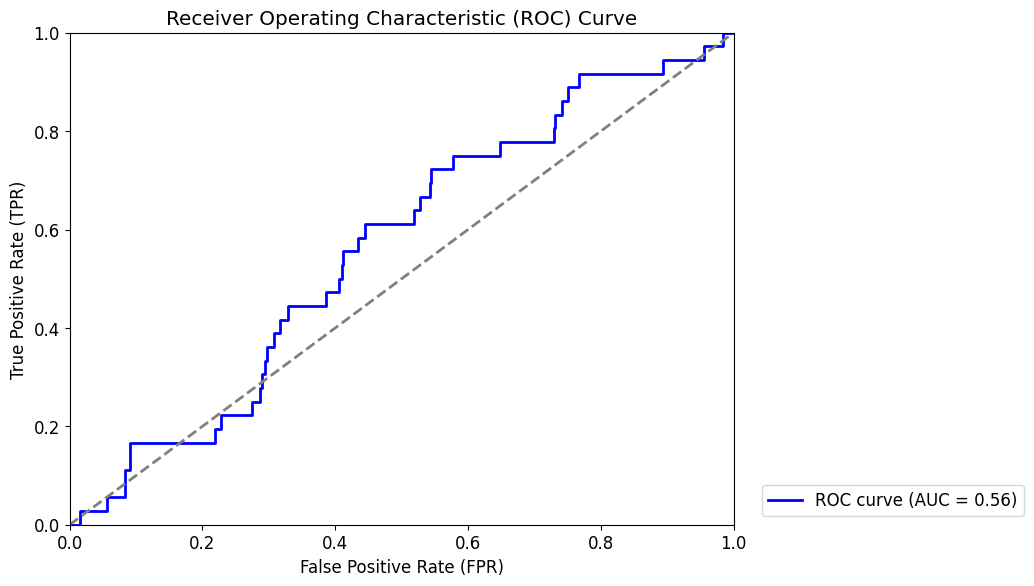

In [104]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


y_pred_prob = final_model.predict_proba(X_test_nonan)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

auc_score = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.subplots_adjust(left=0.12, right=0.95, top=0.92, bottom=0.1)

plt.rcParams['font.size'] = 12

plt.legend(loc='lower right', bbox_to_anchor=(1.45, 0))

plt.show()


In [105]:
from sklearn.metrics import confusion_matrix


In [106]:
def custom_confusion_matrix(y_true, y_pred_probabilities, percentage_threshold):
    # Calculate the threshold based on the percentage of the positive class
    threshold = percentage_threshold
    
    # Convert predicted probabilities to binary predictions using the custom threshold
    y_pred = [1 if prob >= threshold else 0 for prob in y_pred_probabilities]
    
    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    return cm

In [107]:
y_pred_probabilities = final_model.predict_proba(X_test_nonan)[:, 1]  # Second column corresponds to positive class probabilities
y_pred_probabilities

array([0.42612508, 0.0734371 , 0.41849685, ..., 0.4459574 , 0.38998766,
       0.43610156])

In [108]:
percentage_threshold = 0.05 #Bad rate

In [109]:
cm = custom_confusion_matrix(y_test, y_pred_probabilities, percentage_threshold)
cm

array([[   4, 1017],
       [   0,   36]])

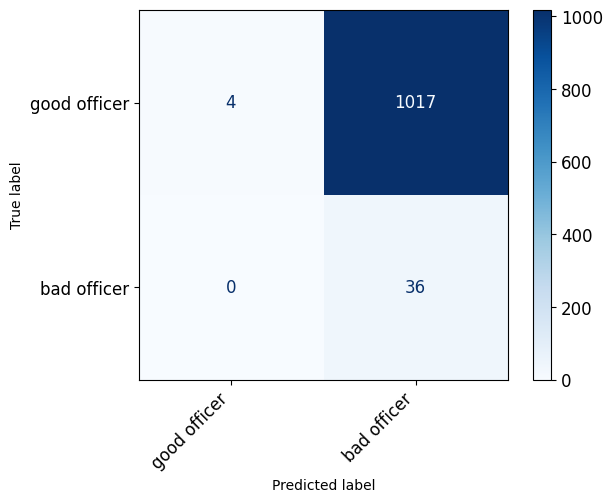

In [110]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

labels = ["good officer", "bad officer"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)

# Adjust label font size and remove the cross in each section
disp.plot(cmap=plt.cm.Blues, values_format='d')

# Customize font size for the "predicted label" and "true label" annotations
plt.xticks(rotation=45, ha="right")
plt.yticks(fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)

# Adjust font size of text below "predicted label" and "true label" annotations
plt.xlabel("Predicted label", fontsize=10)  # Adjust font size
plt.ylabel("True label", fontsize=10)       # Adjust font size

plt.show()

In [111]:
true_negative = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_positive = cm[1][1]

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.03418803418803419
Recall: 1.0


In [112]:
f1_score = 2 * (precision * recall) / (precision + recall)

f1_score

0.06611570247933884